# Loading all required libraries

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [86]:
df_train = pd.read_csv("C:/Users/rajat/Downloads/archive (10)/train.csv")
df_test = pd.read_csv("C:/Users/rajat/Downloads/archive (10)/test.csv")

# Checking the data

In [87]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [88]:
df_train.shape


(7352, 563)

In [89]:
df_test.shape


(2947, 563)

In [90]:
df_train['Activity'].value_counts()


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [91]:
print(df_train.isnull().values.sum())
print(df_test.isnull().values.sum())

0
0


# Visualizing biases in data

<AxesSubplot:title={'center':'Subjects'}, xlabel='subject', ylabel='count'>

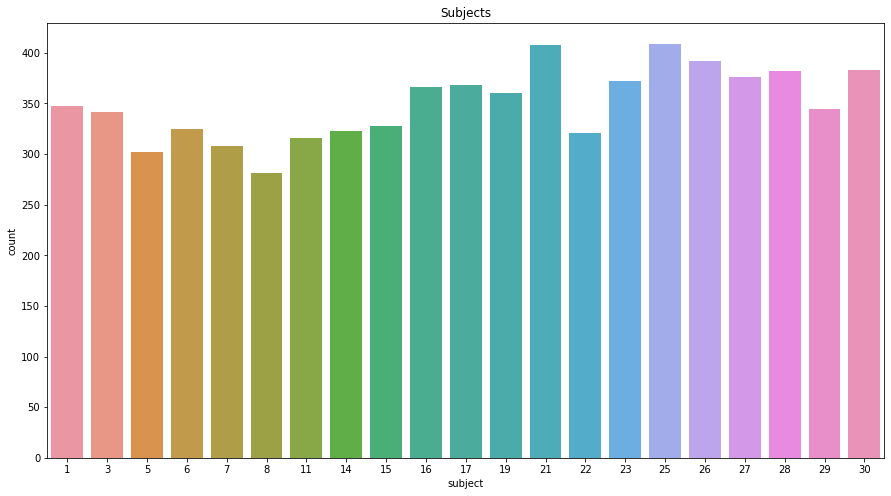

In [92]:
plt.figure(figsize = (15,8))
plt.title('Subjects')
sns.countplot(x = 'subject', data = df_train)

<AxesSubplot:xlabel='Activity', ylabel='count'>

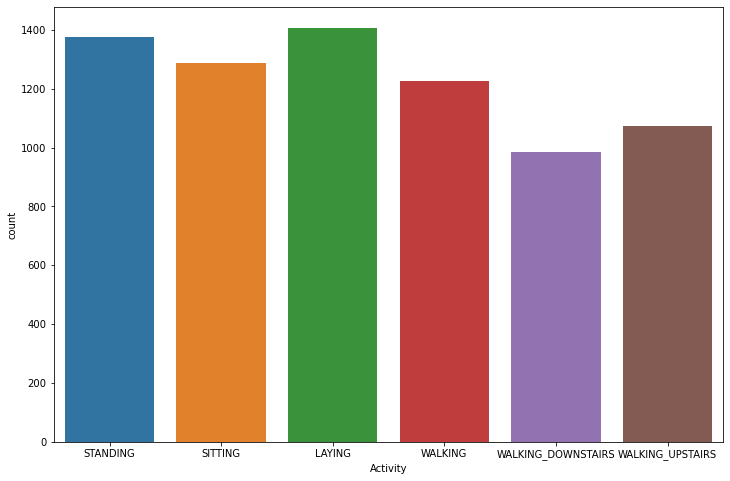

In [93]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Activity', data = df_train)

# Visualization using dimensionality reduction

Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 5.439s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125374
[t-SNE] KL divergence after 1000 iterations: 1.282858


<AxesSubplot:>

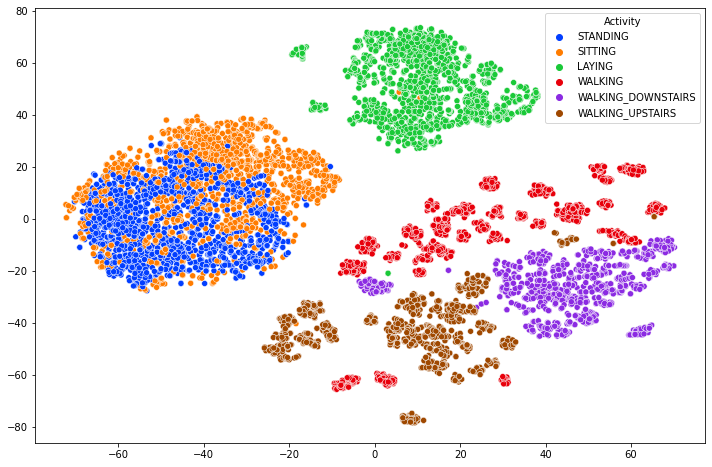

In [94]:
from sklearn.manifold import TSNE
X_for_tsne = df_train.drop(['subject','Activity'], axis = 1)
%time
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_for_tsne)
plt.figure(figsize = (12,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = df_train["Activity"], palette = "bright")

In [95]:
y_train = df_train.Activity
X_train = df_train.drop(['subject','Activity'], axis = 1)
y_test = df_test.Activity
X_test = df_test.drop(['subject','Activity'], axis = 1)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

Training data size: (7352, 561)
Test data size: (2947, 561)


In [96]:
model_score = pd.DataFrame(columns = ("Model","train_score","test_score"))

# Logistic regression 

In [97]:
lr_classifier = LogisticRegression()
# lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state = 42)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
y_predtr = lr_classifier.predict(X_train)

In [98]:
lr_testaccuracy = accuracy_score(y_test,y_pred)
lr_trainaccuracy = accuracy_score(y_train,y_predtr)
print("Accuracy using Logisitc Regression:", lr_testaccuracy)
print("model_score",lr_classifier.score(X_test,y_test))
model_score = model_score.append(pd.DataFrame({'Model':["LogisticRegression"],'train_score':lr_trainaccuracy,'test_score':lr_testaccuracy}))

Accuracy using Logisitc Regression: 0.9582626399728538
model_score 0.9582626399728538


#  SVC

In [99]:
lr_svc = LinearSVC()
# lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions = parameters, random_state = 42)
lr_svc.fit(X_train, y_train)
y_pred = lr_svc.predict(X_test)
y_predtr = lr_svc.predict(X_train)

In [100]:
lrsvc_testaccuracy = accuracy_score(y_test,y_pred)
lrsvc_trainaccuracy = accuracy_score(y_train,y_predtr)
print("Accuracy using SVC:", lrsvc_testaccuracy)
model_score = model_score.append(pd.DataFrame({'Model':["SVC"],'train_score':lrsvc_trainaccuracy,'test_score':lrsvc_testaccuracy}))

Accuracy using SVC: 0.9657278588394977


# Decision Tree

In [101]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
y_predtr = dt_classifier.predict(X_train)

In [102]:
lrdt_testaccuracy = accuracy_score(y_test,y_pred)
lrdt_trainaccuracy = accuracy_score(y_train,y_predtr)
print("Accuracy using Decision Tree:", lrdt_testaccuracy)
model_score = model_score.append(pd.DataFrame({'Model':["Decision Tree"],'train_score':lrdt_trainaccuracy,'test_score':lrdt_testaccuracy}))

Accuracy using Decision Tree: 0.8568035290125552


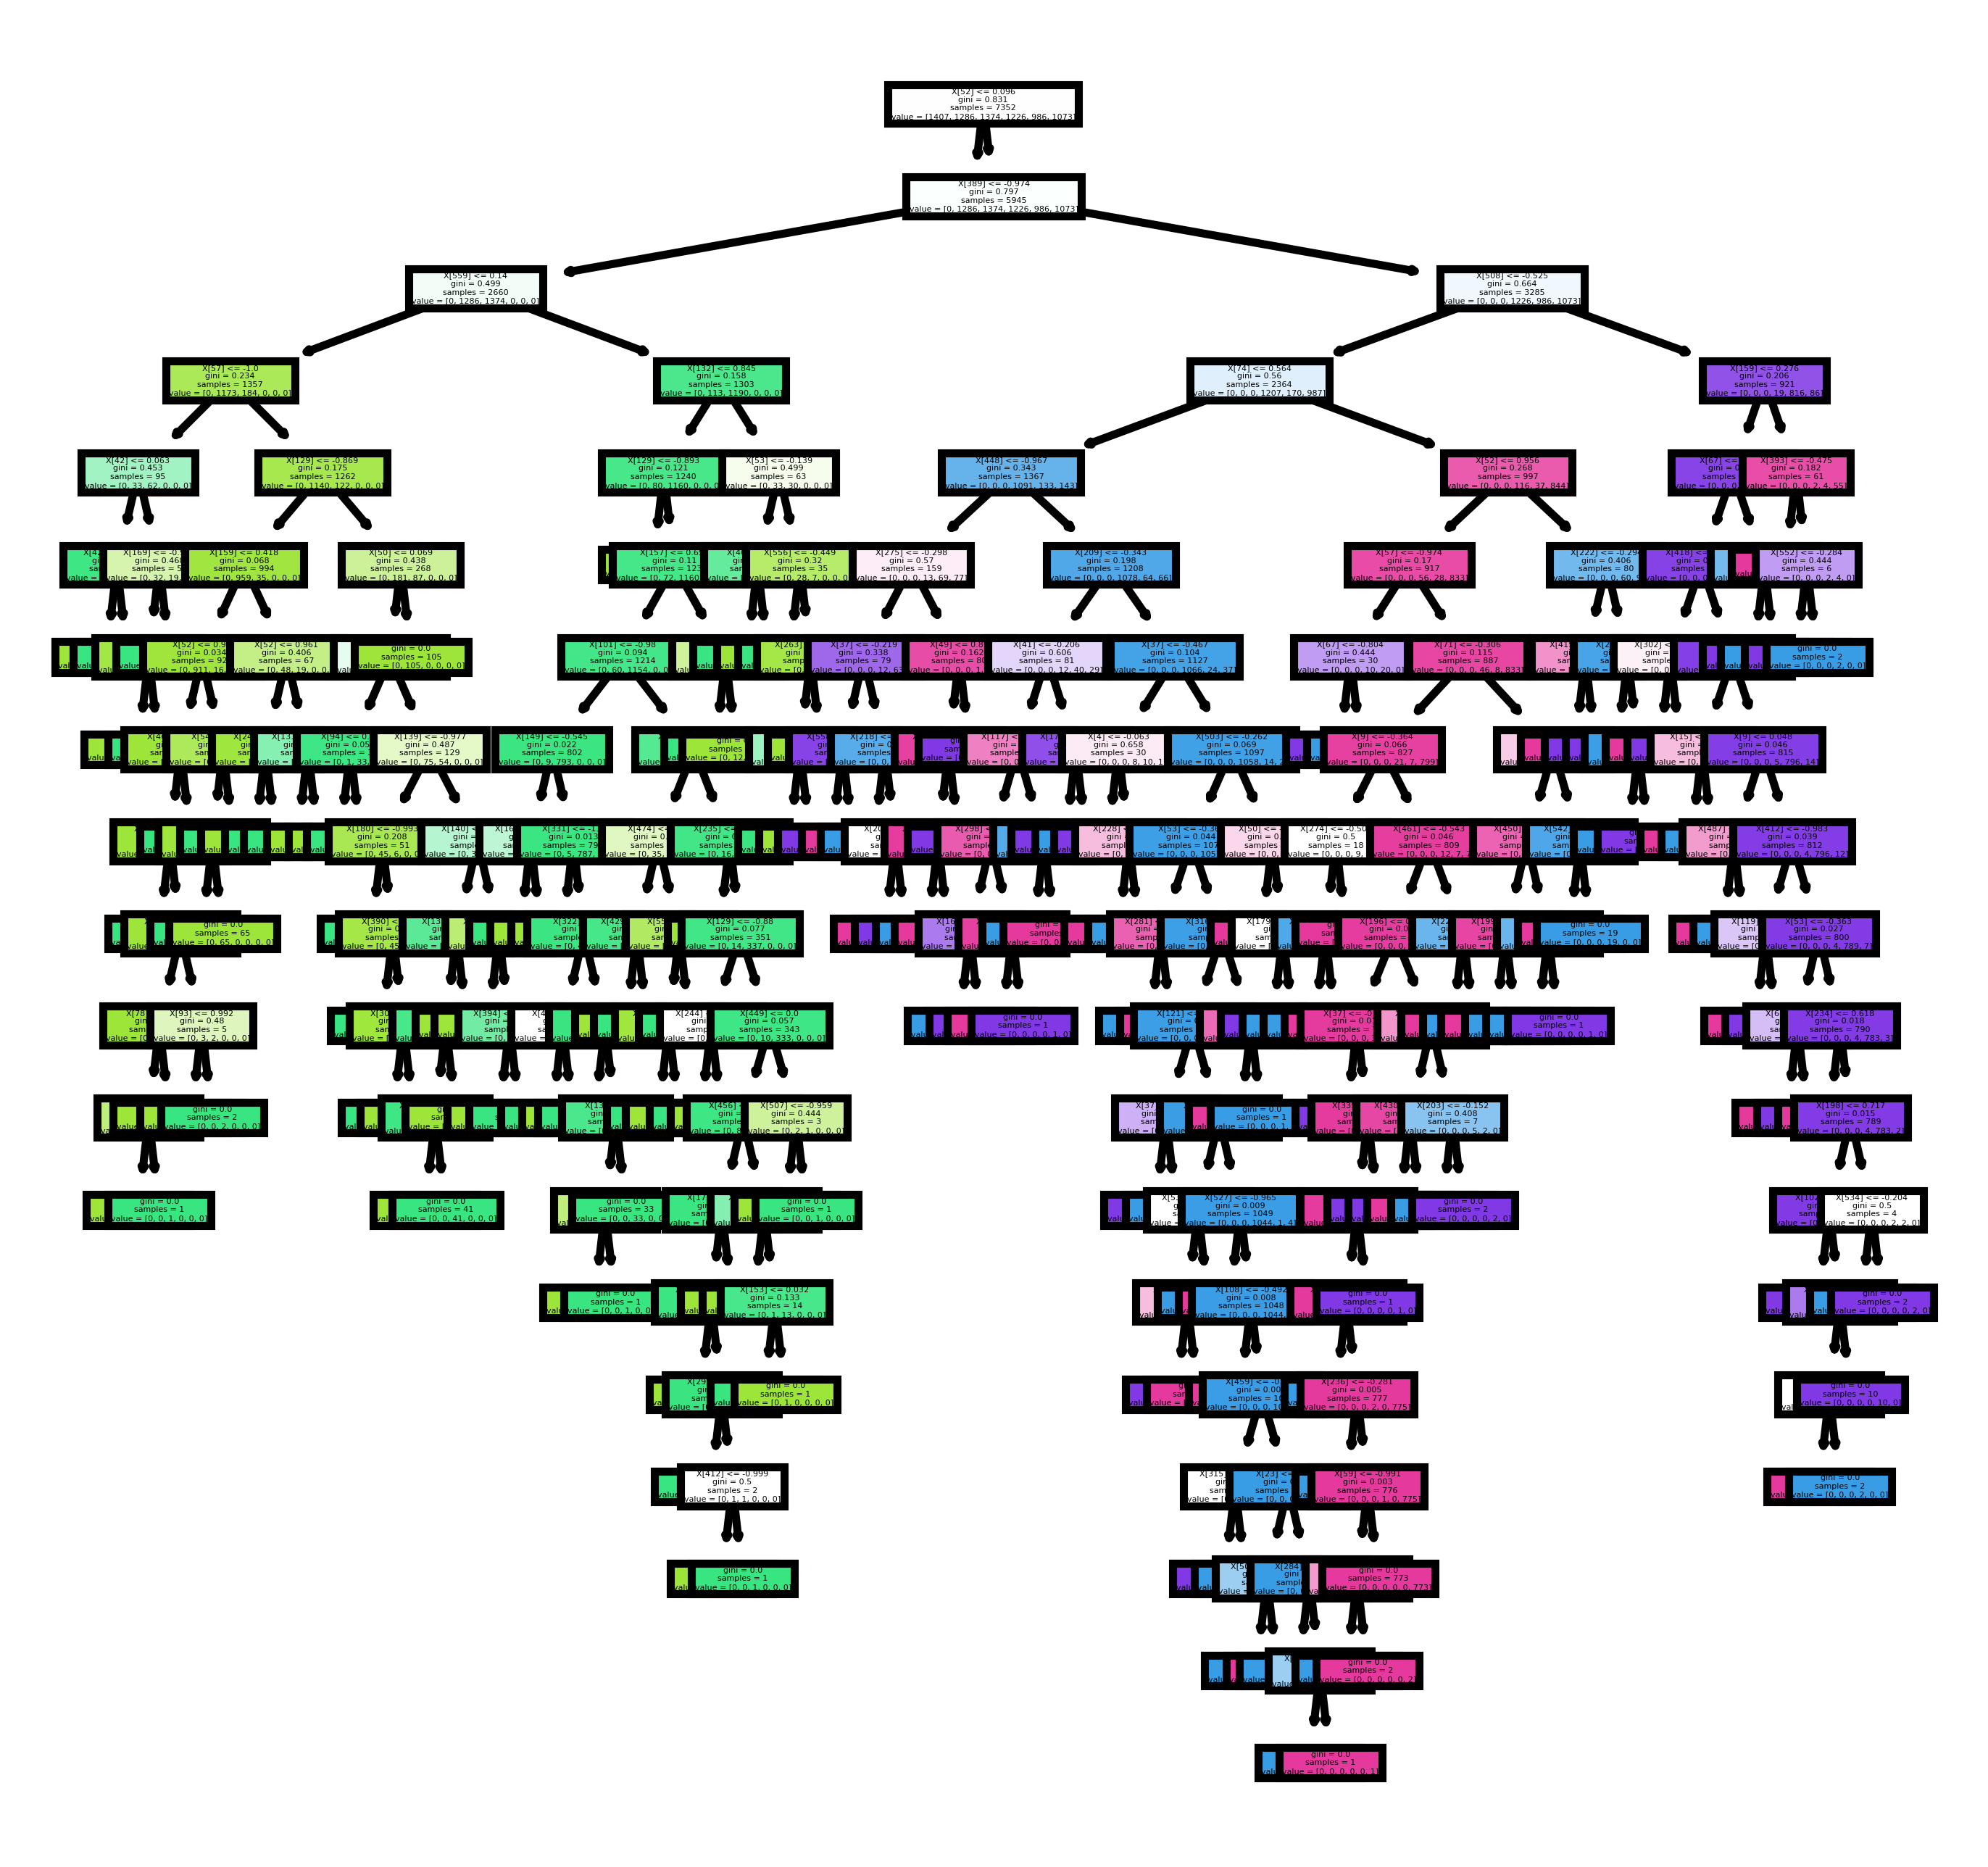

In [103]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dt_classifier,
               filled = True);

# pipelining with Standardization

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression())])
pipeline_svm = Pipeline([('scalar2', StandardScaler()),
                      ('clf', LinearSVC())])
pipeline_dt=Pipeline([('scalar3',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_svm]
pipe_dict = {0: 'Logistic Regression scaled', 1: 'SVC scaled', 2: 'Decision Tree scaled'}
for pipe in pipelines:
  pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    test_acc=int(model.score(X_test,y_test))
    train_acc=int(model.score(X_train,y_train))
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))
    print("{} Train Accuracy:{}".format(pipe_dict[i],model.score(X_train,y_train)))
    model_score = model_score.append(pd.DataFrame({'Model':pipe_dict[i],'train_score':[model.score(X_train,y_train)],'test_score':[model.score(X_test,y_test)]}))

Logistic Regression scaled Test Accuracy:0.9538513742789277
Logistic Regression scaled Train Accuracy:0.9965995647442872
SVC scaled Test Accuracy:0.8588394977943672
SVC scaled Train Accuracy:1.0
Decision Tree scaled Test Accuracy:0.9643705463182898
Decision Tree scaled Train Accuracy:0.9976877040261154


In [105]:
model_score

,Model,train_score,test_score
0,LogisticRegression,0.990887,0.958263
0,SVC,0.995103,0.965728
0,Decision Tree,1.000000,0.856804
0,Logistic Regression scaled,0.996600,0.953851
0,SVC scaled,1.000000,0.858839
0,Decision Tree scaled,0.997688,0.964371
